# Problem 1

### In this notebook I would like to highlight my data analysis, cleaning, and manipulation skills. In addition to this I also utilize a number of different machine learning classification techniques to determine which one is best.

### The goal of this problem was to utilize different classification techniques to determine whether the "area" column would be larger than 0.

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets

In [100]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

In [101]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [102]:
df = pd.read_csv('JupyterLab/PS4/forestfires.csv',index_col=0)

In [103]:
df

,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,,,,,,,,,,,,
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16


### Part a, b, c, & d

In [11]:
df['nonzero'] = 0
df.loc[(df['area'] > 0), 'nonzero'] = 1
print(df)

    Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
X                                                                         
7   5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00   
7   4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00   
7   4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00   
8   6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00   
8   6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00   
.. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...   
4   3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44   
2   4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29   
7   4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16   
1   4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00   
6   3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00   

    nonzero  
X         

In [13]:
X = df.iloc[:, 3:11]
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
X,,,,,,,,
7,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
7,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
8,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
8,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...
4,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
2,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0


In [14]:
y = df.nonzero
y
### area is the variable we are trying to predict (1 or 0)

X
7    0
7    0
7    0
8    0
8    0
    ..
4    1
2    1
7    1
1    0
6    0
Name: nonzero, Length: 517, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 1)
### splitting data into test and train

In [16]:
#Create SVM Models

In [17]:
C = 3.0  # SVM regularization parameter
clf_linear = svm.SVC(kernel='linear', C=C)

In [18]:
clf_radial = svm.SVC(kernel='rbf', gamma = 0.9 ,  C=C)

In [19]:
clf_poly = svm.SVC(kernel='poly', degree=1, gamma='auto', C=C)

In [20]:
#Fit Models

In [21]:
model_linear = clf_linear.fit(X_train, y_train)

In [22]:
model_radial = clf_radial.fit(X_train, y_train)

In [23]:
model_polynomial = clf_poly.fit(X_train, y_train)

In [24]:
#Predict

#### Linear

In [25]:
y_pred_linear = model_linear.predict(X_test)

In [26]:
score_linear = model_linear.score(X_test, y_test)
print('Linear accuracy Score: ', score_linear)

Linear accuracy Score:  0.5076923076923077


In [27]:
print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

           0       0.47      0.31      0.37        62
           1       0.52      0.69      0.59        68

    accuracy                           0.51       130
   macro avg       0.50      0.50      0.48       130
weighted avg       0.50      0.51      0.49       130



In [28]:
print(confusion_matrix(y_test, y_pred_linear))

[[19 43]
 [21 47]]


#### Radial

In [29]:
y_pred_radial = model_radial.predict(X_test)

In [30]:
score_radial = model_radial.score(X_test, y_test)
print('Radial accuracy Score: ', score_radial)

Radial accuracy Score:  0.5307692307692308


In [31]:
print(classification_report(y_test, y_pred_radial))

              precision    recall  f1-score   support

           0       0.54      0.11      0.19        62
           1       0.53      0.91      0.67        68

    accuracy                           0.53       130
   macro avg       0.53      0.51      0.43       130
weighted avg       0.53      0.53      0.44       130



In [32]:
print(confusion_matrix(y_test, y_pred_radial))

[[ 7 55]
 [ 6 62]]


#### Polynomial

In [33]:
y_pred_polynomial = model_polynomial.predict(X_test)

In [34]:
score_poly = model_polynomial.score(X_test, y_test)
print('Polynomial accuracy Score: ', score_poly)

Polynomial accuracy Score:  0.5


In [35]:
print(classification_report(y_test, y_pred_polynomial))

              precision    recall  f1-score   support

           0       0.46      0.31      0.37        62
           1       0.52      0.68      0.59        68

    accuracy                           0.50       130
   macro avg       0.49      0.49      0.48       130
weighted avg       0.49      0.50      0.48       130



In [36]:
print(confusion_matrix(y_test, y_pred_polynomial))

[[19 43]
 [22 46]]


### Comparing the performance of the best models for the three kernels, as seen in the classification tables above the radial kernel SVM had the best classification score. It has an accuracy of 53%, and better precision values as well

## Part e: Fit Decision Tree and Logistic Regression

In [164]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeClassifier

In [165]:
tree = DecisionTreeClassifier(random_state=0).fit(X_train,y_train) 
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}

In [166]:
print('Leaves: ' +str(tree.get_n_leaves()))
print('Depth: ' + str(tree.get_depth()))

Leaves: 111
Depth: 15


In [175]:
cv_df = pd.DataFrame(columns=['CCP','Accuracy','Recall'])
for ccp in np.arange(0,0.015,0.001):
    tree = DecisionTreeClassifier(ccp_alpha = ccp)
    scores = cross_val_score(tree, X_train, y_train)
    accuracy = scores.mean()
    recall = scores.std()
    cv_df = cv_df.append({'CCP':ccp, 'Accuracy':accuracy, 'Recall':recall}, ignore_index = True)

print(cv_df)

      CCP  Accuracy    Recall
0   0.000  0.571262  0.045277
1   0.001  0.568332  0.051343
2   0.002  0.570996  0.061482
3   0.003  0.560773  0.044325
4   0.004  0.563303  0.059974
5   0.005  0.545221  0.057639
6   0.006  0.537363  0.083607
7   0.007  0.529670  0.074411
8   0.008  0.545221  0.065321
9   0.009  0.563337  0.059707
10  0.010  0.565934  0.059152
11  0.011  0.560673  0.046124
12  0.012  0.560673  0.046124
13  0.013  0.542524  0.025856
14  0.014  0.542524  0.025856


In [176]:
cv_df.columns = ['CCP','Accuracy','Recall']

Text(0, 0.5, 'Accuracy')

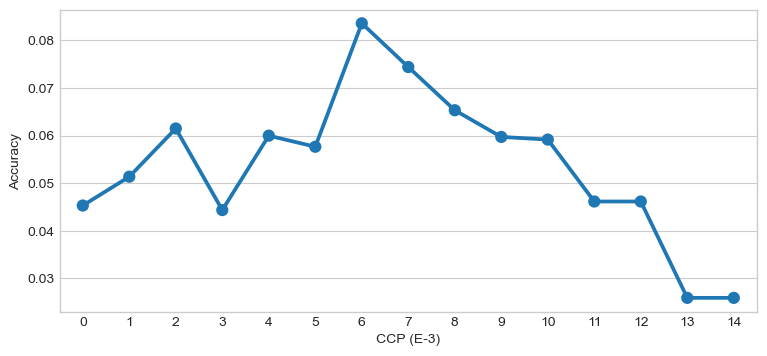

In [182]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(9,4))
ax = sns.pointplot(x = cv_df.CCP, y = cv_df.Recall, ci = cv_df.Recall)
ax.xaxis.set_major_formatter(ticker.EngFormatter())
plt.xlabel('CCP (E-3)')
plt.ylabel('Accuracy')

In [183]:
ccp_optimal=cv_df.loc[cv_df.Recall.idxmax(), 'CCP']
print('Optimal CCP: ' + str(np.round(ccp_optimal,3)))

Optimal CCP: 0.006


In [191]:
pruned_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_optimal).fit(X_train,y_train) 
pruned_tree.get_params()

{'ccp_alpha': 0.006,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}

In [192]:
print('Leaves: ' +str(pruned_tree.get_n_leaves()))
print('Depth: ' + str(pruned_tree.get_depth()))

Leaves: 27
Depth: 11


In [193]:
y_pred_prune = pruned_tree.predict(X_test)
y_pred_prune

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0])

### Logistic

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [49]:
model_logistic = LogisticRegression()
model_logistic = model_logistic.fit(X_train,y_train)

/Users/jordanhoward/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [196]:
perf = pd.DataFrame(columns=['Accuracy', 'Recall'],
                    index = ['Linear SVM', 'Radial SVM', 'Polynomial SVM',
                             'Pruned Tree', 'Logistic Regression'])

perf.loc['Linear SVM', 'Accuracy'] = accuracy_score(y_test, model_linear.predict(X_test))
perf.loc['Linear SVM', 'Recall'] = recall_score(y_test, model_linear.predict(X_test))


perf.loc['Radial SVM', 'Accuracy'] = accuracy_score(y_test, model_radial.predict(X_test))
perf.loc['Radial SVM', 'Recall'] = recall_score(y_test, model_radial.predict(X_test))

perf.loc['Polynomial SVM', 'Accuracy'] = accuracy_score(y_test, model_polynomial.predict(X_test))
perf.loc['Polynomial SVM', 'Recall'] = recall_score(y_test, model_polynomial.predict(X_test))

perf.loc['Pruned Tree', 'Accuracy'] = accuracy_score(y_test, pruned_tree.predict(X_test))
perf.loc['Pruned Tree', 'Recall'] = recall_score(y_test, pruned_tree.predict(X_test))

perf.loc['Logistic Regression', 'Accuracy'] = accuracy_score(y_test, model_logistic.predict(X_test))
perf.loc['Logistic Regression', 'Recall'] = recall_score(y_test, model_logistic.predict(X_test))

perf

,Accuracy,Recall
Linear SVM,0.507692,0.691176
Radial SVM,0.530769,0.911765
Polynomial SVM,0.5,0.676471
Pruned Tree,0.515385,0.5
Logistic Regression,0.484615,0.602941


# Problem 2

### Now I try to predict area as continuous variable using regression methods

### Part a

In [56]:
df

,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,nonzero
X,,,,,,,,,,,,,
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0
7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0
8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1
2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1
7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1


In [57]:
X1 = df.iloc[:, 3:11]
X1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
X,,,,,,,,
7,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
7,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
8,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
8,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...
4,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
2,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0


In [58]:
y1 = df.area
y1
### trying to predict area as continuous variable now

X
7     0.00
7     0.00
7     0.00
8     0.00
8     0.00
     ...  
4     6.44
2    54.29
7    11.16
1     0.00
6     0.00
Name: area, Length: 517, dtype: float64

In [59]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=.25, random_state = 1)

### SVR

In [60]:
from sklearn.svm import SVR

In [83]:
clf_radial1 = SVR(kernel = 'rbf')
model_radial1 = clf_radial1.fit(X_train1, y_train1)

In [84]:
y_pred_radial1 = model_radial1.predict(X_test1)

In [94]:
MSE = mean_squared_error(y_test1, y_pred_radial1)
MAE = mean_absolute_error(y_test1, y_pred_radial1)

In [96]:
MSE

4919.2677469555665

In [97]:
MAE

14.584094071875093

#### The classification models in Question 1 had around a 50% accuracy rate when classifying the area as 0 or 1. For example the radial kernel SMV had a MSE of 0.46923. Here we can see that the Mean squared error is 4919 hectares. In terms of a comparison between the regression and the classification, I would argue that the regression performs better than the classification. The results from the classification are almost no better than choosing 1 or 0 at random, while the regression results have a mean aboslute error of 14.5, meaning the model on average predicts the  area within 14 hectares.

### Part B

### Multiple Linear Regression

In [88]:
from sklearn import linear_model

In [89]:
model_linear1 = linear_model.LinearRegression()
model_linear1 = model_linear1.fit(X_train1, y_train1)

In [76]:
y_pred_linear1 = model_linear1.predict(X_test1)

In [105]:
perf1 = pd.DataFrame(columns=['MSE', 'MAE'],
                    index = ['Radial SVM', 'Linear Regression'])

perf1.loc['Radial SVM', 'MSE'] = mean_squared_error(y_test1, y_pred_radial1)
perf1.loc['Radial SVM', 'MAE'] = mean_absolute_error(y_test1, y_pred_radial1)

perf1.loc['Linear Regression', 'MSE'] = mean_squared_error(y_test1, y_pred_linear1)
perf1.loc['Linear Regression', 'MAE'] = mean_absolute_error(y_test1, y_pred_linear1)

perf1

,MSE,MAE
Radial SVM,4919.27,14.5841
Linear Regression,4672.65,20.607


### As seen in the table above, the linear regression has a slightly lower MSE, but a larger MAE. Because of this, it is hard to distinguish if one is necessarily better than the other. It seems as though both are able to predict with some degree of accuracy, but neither is much more accurate than the other.